In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

   Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0    Male     Yes          1      Graduate           Yes             9225   
1  Female     Yes          2  Not Graduate            No             2026   
2    Male     Yes          0  Not Graduate            No             4724   
3    Male      No          0      Graduate            No             3375   
4    Male     Yes          0      Graduate            No             3263   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0               2355         116               360             1.0   
1               4278          53               360             1.0   
2               4724         491               180             1.0   
3               2557         458               240             0.0   
4                545         352               120             1.0   

  Property_Area  Loan_Status  
0         Urban            0  
1         Urban            0  
2         Urban        

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


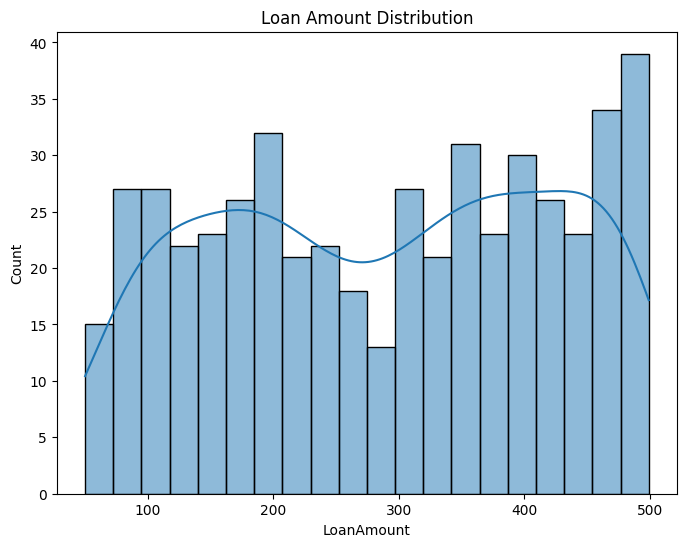

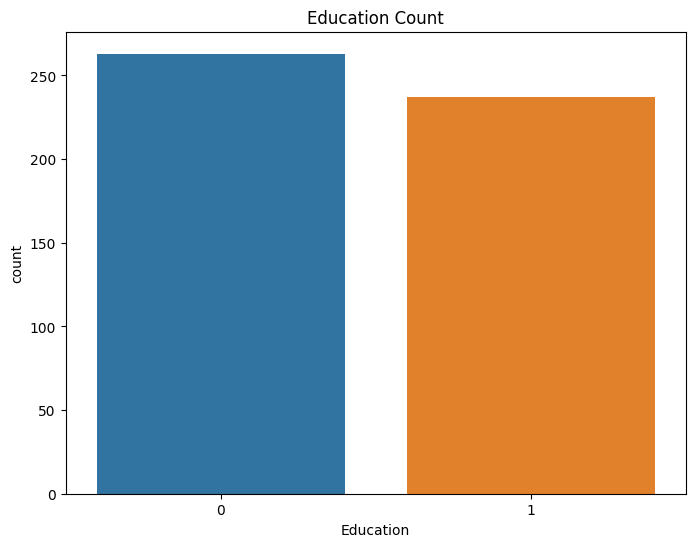

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


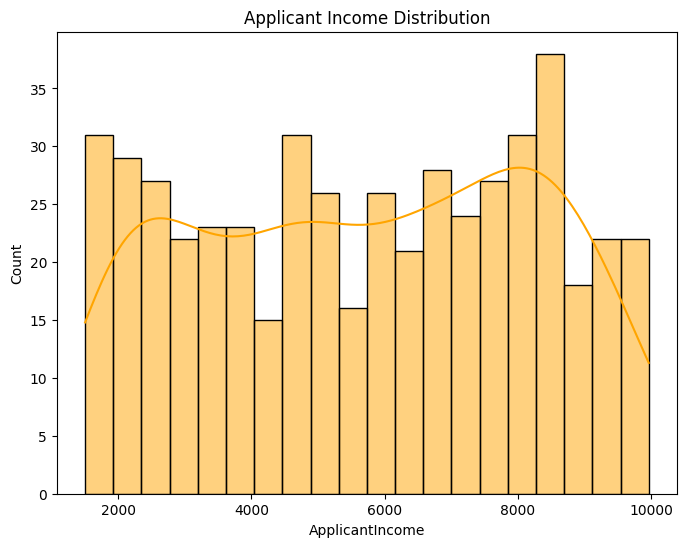

Accuracy: 0.56
Confusion Matrix:
 [[24 24]
 [20 32]]


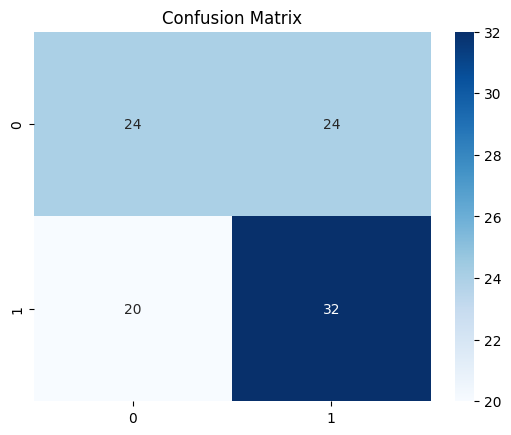

In [4]:
# Task 2: Loan Prediction - Using Simulated Dataset

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Simulate a Loan dataset (simplified)
np.random.seed(42)
n = 500
df = pd.DataFrame({
    'Gender': np.random.choice(['Male','Female'], n),
    'Married': np.random.choice(['Yes','No'], n),
    'Dependents': np.random.choice(['0','1','2','3+'], n),
    'Education': np.random.choice(['Graduate','Not Graduate'], n),
    'Self_Employed': np.random.choice(['Yes','No'], n),
    'ApplicantIncome': np.random.randint(1500, 10000, n),
    'CoapplicantIncome': np.random.randint(0, 5000, n),
    'LoanAmount': np.random.randint(50, 500, n),
    'Loan_Amount_Term': np.random.choice([360, 120, 180, 240], n),
    'Credit_History': np.random.choice([1.0, 0.0], n),
    'Property_Area': np.random.choice(['Urban','Semiurban','Rural'], n),
    'Loan_Status': np.random.choice([0,1], n)  # 1 = Approved, 0 = Not Approved
})

# Overview
print(df.head())
print(df.info())

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# EDA: visualize key features
plt.figure(figsize=(8,6))
sns.histplot(df['LoanAmount'], bins=20, kde=True)
plt.title("Loan Amount Distribution")
plt.savefig('loanamount_histogram.png')
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x='Education', data=df)
plt.title("Education Count")
plt.savefig('education_count.png')
plt.show()

plt.figure(figsize=(8,6))
sns.histplot(df['ApplicantIncome'], bins=20, kde=True, color='orange')
plt.title("Applicant Income Distribution")
plt.savefig('income_histogram.png')
plt.show()

# Features and target
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

# Confusion matrix plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.savefig('confusion_matrix.png')
plt.show()